# Exploring sailplane performance in Python with glidepy

The glider polar describes the relationship between sink rate and speed. It is usually included in the glider's flight manual often in the form of a rather crude graph. For example, this is the polar provided for the ASW27. Both unballasted and ballasted curves are shown.

![](img/asw27polar.PNG)

We will create a mathematical representation of this curve using the programming language Python and the glidepy library. We can then easily analyze various aspects of salplane performance.

## What is glidepy?

glidepy is a Python module that performs common polar and speed-to-fly calculations useful for sailplane performance analysis and simulations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
sns.set()

In [2]:
# import the glidepy module
import glidepy as gp

In [3]:
warnings.simplefilter('ignore', np.RankWarning)
%matplotlib notebook

Lets define some useful unit conversion factors.

In [4]:
kmh_to_knots = 0.539957
ms_to_knots = 1.94384
knots_to_kmh = 1.852
nm_to_feet = 6076.12
nm_to_sm = 1.15078
kg_to_lbs = 2.20462

## Creating the asw27

Create an instance of an asw27 Glider object and initialize it with the polar data points and the reference weight. The first vector are speeds in Km/h. The secind are the corresponding sink rates in m/s. The weight is in lbs. This is the part that uniquely specifies the glider we are analyzing and the configuration (ballasted or not).

For this, we need at least three points from the original polar and the associated reference weight. The rest is calculated by glidepy, including any data for other weights.

In [5]:
speeds = [75, 80, 90, 105, 127.5, 143.0, 155.0, 200.0]
sink_rates = [-0.52, -0.49, -0.55, -0.6, -0.8, -1.0, -1.2, -2.4]

ref_weight = 320 * kg_to_lbs  
print("Reference weight in lbs: %d" % ref_weight)
weight = 1102

Reference weight in lbs: 705


In [6]:
asw27 = gp.Glider(speeds, sink_rates, ref_weight)

# A ballasted glider is created by specifying the ballasted weight also
asw27_wet = gp.Glider(speeds, sink_rates, ref_weight, weight)

#### glidepy creates a mathematical model of the sailplane polar.

Now we can ask: What is the sink rate (in knots) at 100 knots? We can query the model of the polar.

In [7]:
asw27.polar(100)  # speed and resulting sink rate in knots

-3.739792981155273

## Plotting the polar

Lets plot the polar in the speed range 40 to 140 knots in 5 knot increments.

In [8]:
speed_range = np.arange(35, 145, 2)
polar_graph = [asw27.polar(speed) for speed in speed_range]

# And for the ballasted glider too
polar_graph_wet = [asw27_wet.polar(speed) for speed in speed_range]

We will plot the the dry and wet polars, together with the source data points from which the models were created.

<IPython.core.display.Javascript object>


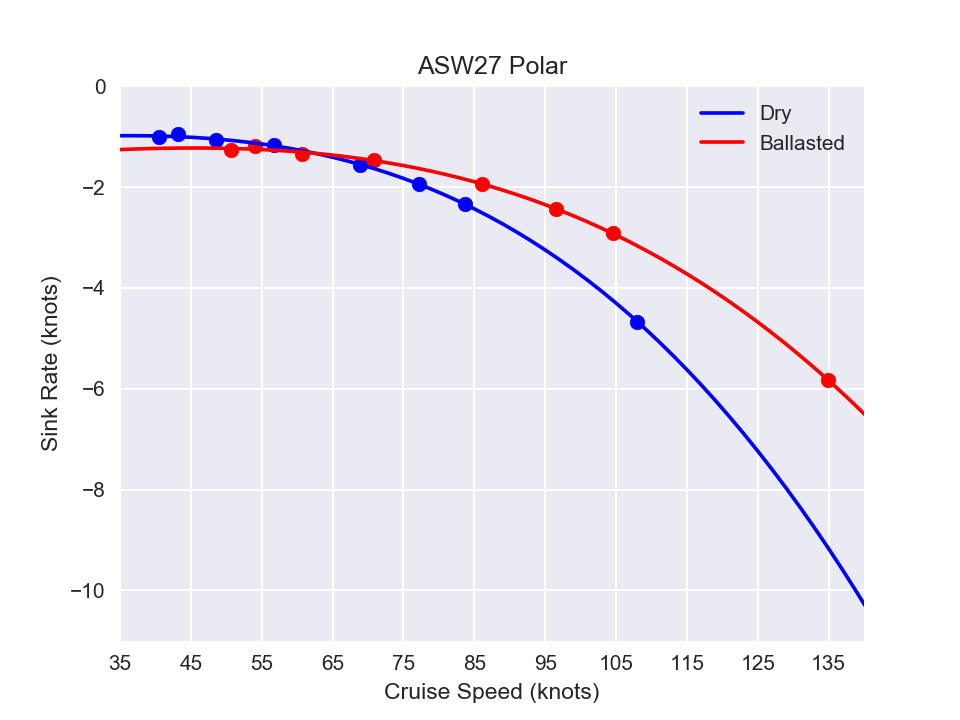

In [9]:
fig, ax = plt.subplots()

ax.plot(speed_range, polar_graph, color="blue")
ax.scatter(asw27.speeds, asw27.sink_rates, color="blue")

ax.plot(speed_range, polar_graph_wet, color="red")
ax.scatter(asw27_wet.speeds, asw27_wet.sink_rates, color="red")

ax.set(title='ASW27 Polar',
       ylabel='Sink Rate (knots)',
       xlabel='Cruise Speed (knots)',
       xticks=range(35,150,10), 
       ylim=(-11, 0),
       xlim=(35, 140))
ax.legend(['Dry', 'Ballasted'])
plt.show()

## Plotting the L/D

In [10]:
speed_range = np.arange(45, 145, 2)
glide_ratio_graph = [asw27.glide_ratio(speed) for speed in speed_range]

# And for the ballasted glider too
glide_ratio_graph_wet = [asw27_wet.glide_ratio(speed) for speed in speed_range]

<IPython.core.display.Javascript object>


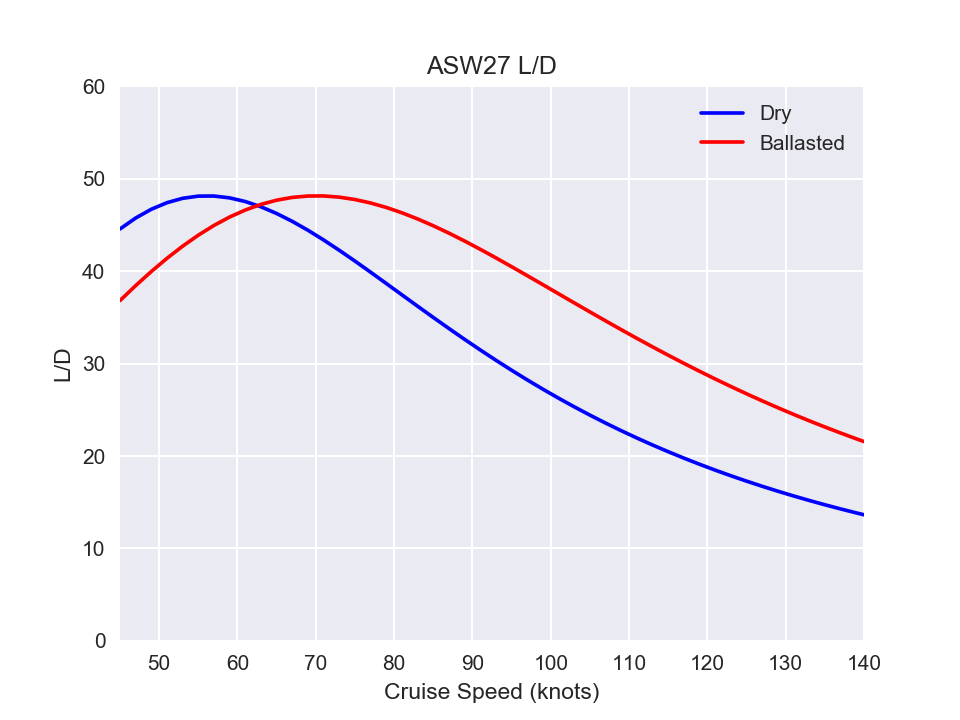

In [11]:
fig, ax = plt.subplots()

ax.plot(speed_range, glide_ratio_graph, color="blue")
ax.plot(speed_range, glide_ratio_graph_wet, color="red")
ax.set(title='ASW27 L/D',
       ylabel='L/D',
       xlabel='Cruise Speed (knots)',
       xticks=range(40,150,10), 
       ylim=(0, 60),
       xlim=(45, 140))
ax.legend(['Dry', 'Ballasted'])
plt.show()

#### The maximum point of each plot is the best L/D 

## Best L/D 
#### glidepy calculates the best L/D directly

### Dry

In [12]:
asw27.best_ld()

48.15803657675829

In [13]:
asw27.best_ld_speed()    # knots

56.092080568147573

In [14]:
asw27.best_ld_speed() * knots_to_kmh   # in km/h

103.88253321220931

### Ballasted

In [15]:
asw27_wet.best_ld()

48.158036736776786

In [16]:
asw27_wet.best_ld_speed()    # knots

70.102197850647002

In [17]:
asw27_wet.best_ld_speed() * knots_to_kmh   # in km/h

129.82927041939826

#### Note the higher best L/D speed for the ballasted glider. The actual best L/D stays the same.